In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('teen_phone_addiction_dataset (1).csv')
df.head(10)


,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
5,6,Mary Adams,13,Female,East Angelachester,10th,3.9,6.3,89,3,...,1.1,135,8,3.8,0.0,1.4,Social Media,7,6.0,8.8
6,7,Hailey Moses,16,Male,North Jeffrey,11th,6.3,6.7,89,3,...,0.8,129,9,1.8,2.7,1.0,Education,7,7.8,10.0
7,8,Veronica Marshall,13,Other,Jenniferport,10th,5.1,6.1,70,2,...,1.0,34,7,2.3,1.6,0.5,Browsing,9,8.0,8.0
8,9,Edward Avila,13,Male,Leebury,8th,3.0,9.1,79,0,...,0.9,70,13,2.7,2.2,1.3,Education,10,9.1,7.3
9,10,James Carter,18,Other,Prestonview,11th,3.9,5.8,89,8,...,0.9,121,13,2.7,0.4,1.0,Other,9,2.9,9.1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

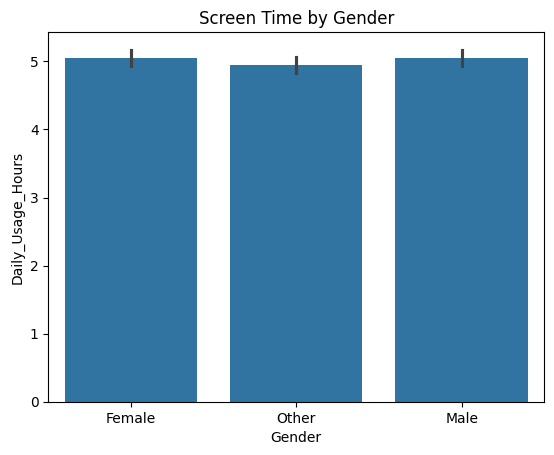

In [10]:
#Q1)Does screen time vary by genders?

df.groupby('Gender')['Daily_Usage_Hours'].describe()
sns.barplot(data=df, x='Gender', y='Daily_Usage_Hours')
plt.title("Screen Time by Gender")
plt.show()

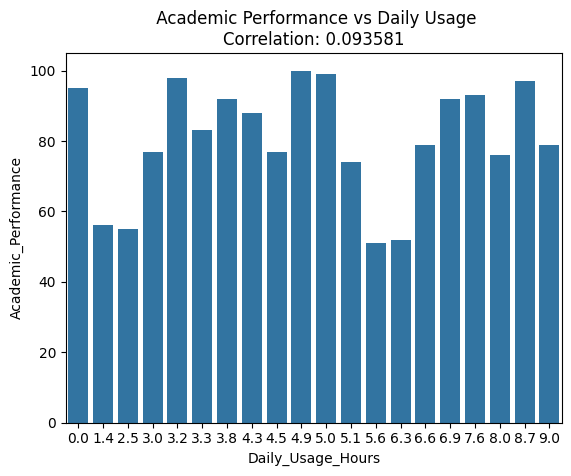

In [40]:
#Q2) Is there a relationship between academic performance and daily usage

#Randomizing 20 rows of data
Sampling_df = df.sample(n = 20, random_state = 42)



corr = Sampling_df["Academic_Performance"].corr(Sampling_df['Daily_Usage_Hours'])

sns.barplot(data = Sampling_df , x = "Daily_Usage_Hours", y = 'Academic_Performance')
plt.title(f' Academic Performance vs Daily Usage\nCorrelation: {corr:2f}')
plt.show()


In [76]:
#Q3) Is there any correlation of student spending time between social media, gaming and school. 
q3_data = df[['Daily_Usage_Hours', 'Time_on_Social_Media','Time_on_Gaming', 'Time_on_Education']]
q3_data.head(10)

,Daily_Usage_Hours,Time_on_Social_Media,Time_on_Gaming,Time_on_Education
0,4.0,3.6,1.7,1.2
1,5.5,1.1,4.0,1.8
2,5.8,0.3,1.5,0.4
3,3.1,3.1,1.6,0.8
4,2.5,2.6,0.9,1.1
5,3.9,3.8,0.0,1.4
6,6.3,1.8,2.7,1.0
7,5.1,2.3,1.6,0.5
8,3.0,2.7,2.2,1.3
9,3.9,2.7,0.4,1.0


<Axes: >

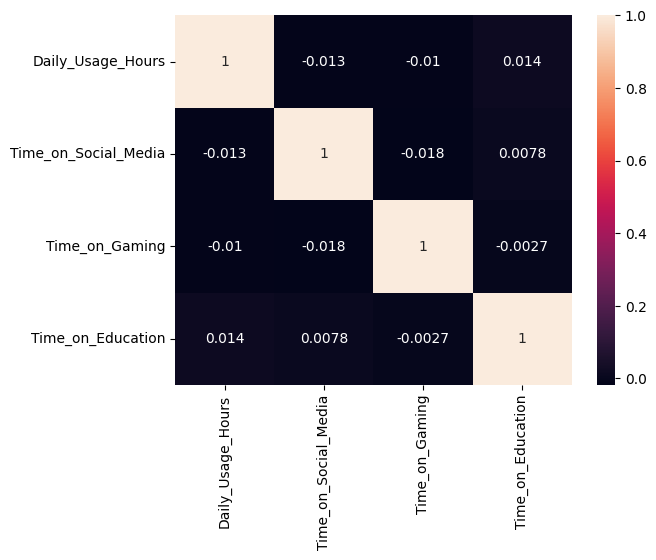

In [77]:

sns.heatmap(q3_data.corr(), annot = True, cmap = 'rocket')
#There are negative correlation between usuage on platform, education and overall hours

In [78]:
#Q4 Based on Q3, I wonder is there any correlation of all numerical variables. 

q4_data = df[['Daily_Usage_Hours', 
'Sleep_Hours', 
'Academic_Performance', 
'Social_Interactions', 
'Exercise_Hours', 
'Anxiety_Level', 
'Depression_Level', 
'Self_Esteem', 
'Parental_Control', 
'Screen_Time_Before_Bed', 
'Phone_Checks_Per_Day', 
'Apps_Used_Daily', 
'Time_on_Social_Media',
'Time_on_Gaming', 
'Time_on_Education' 
]]

q4_data.head(10)


,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education
0,4.0,6.1,78,5,0.1,10,3,8,0,1.4,86,19,3.6,1.7,1.2
1,5.5,6.5,70,5,0.0,3,7,3,0,0.9,96,9,1.1,4.0,1.8
2,5.8,5.5,93,8,0.8,2,3,10,0,0.5,137,8,0.3,1.5,0.4
3,3.1,3.9,78,8,1.6,9,10,3,0,1.4,128,7,3.1,1.6,0.8
4,2.5,6.7,56,4,1.1,1,5,1,0,1.0,96,20,2.6,0.9,1.1
5,3.9,6.3,89,3,0.7,7,1,3,0,1.1,135,8,3.8,0.0,1.4
6,6.3,6.7,89,3,0.9,6,7,9,0,0.8,129,9,1.8,2.7,1.0
7,5.1,6.1,70,2,2.2,5,6,8,0,1.0,34,7,2.3,1.6,0.5
8,3.0,9.1,79,0,1.8,1,7,6,0,0.9,70,13,2.7,2.2,1.3
9,3.9,5.8,89,8,1.1,9,1,9,0,0.9,121,13,2.7,0.4,1.0


<Axes: >

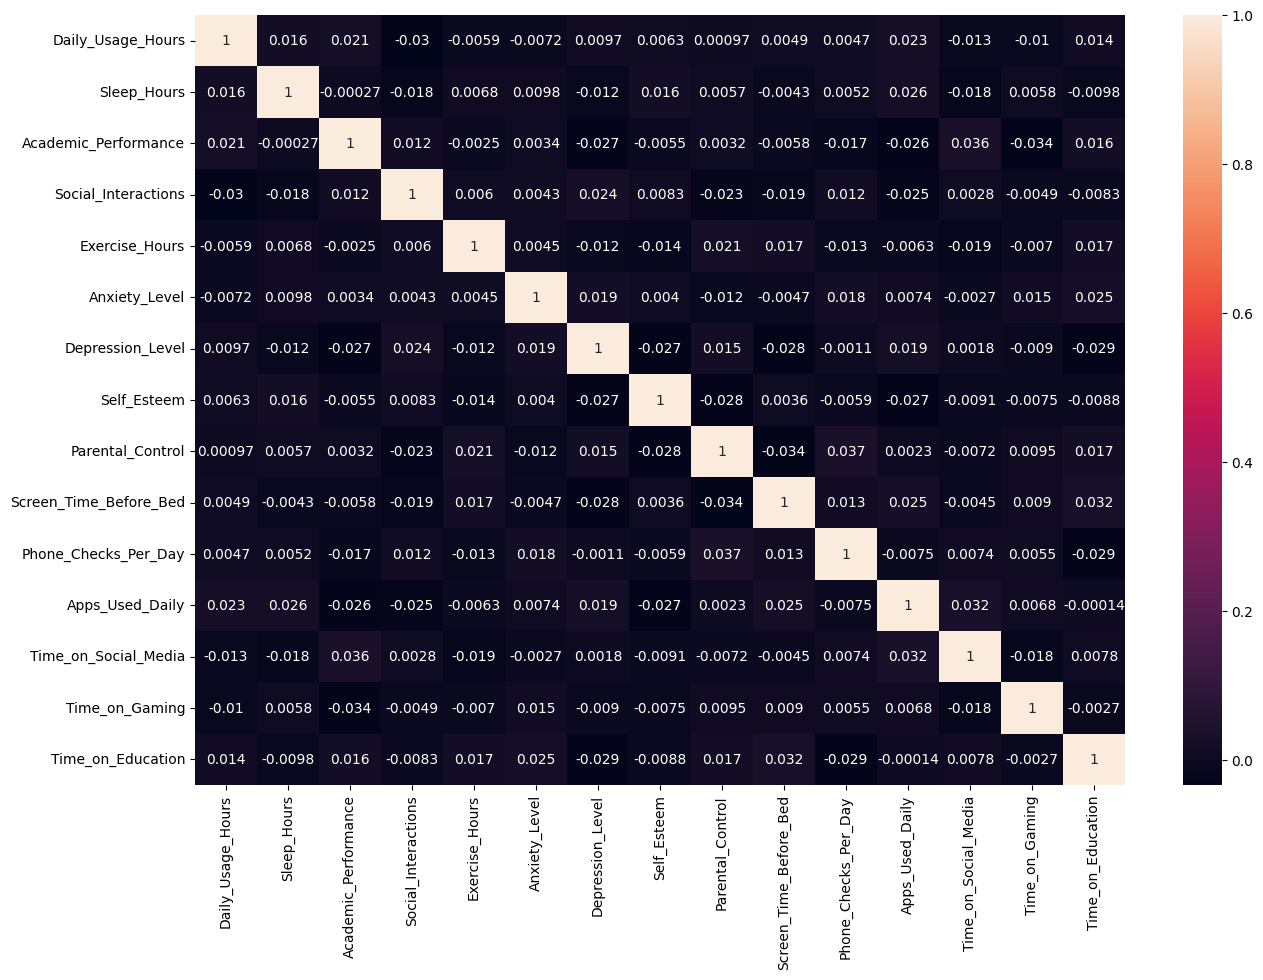

In [79]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(q4_data.corr(), annot = True, cmap = 'rocket')

 # Set the figure size
# No columns are related to each other

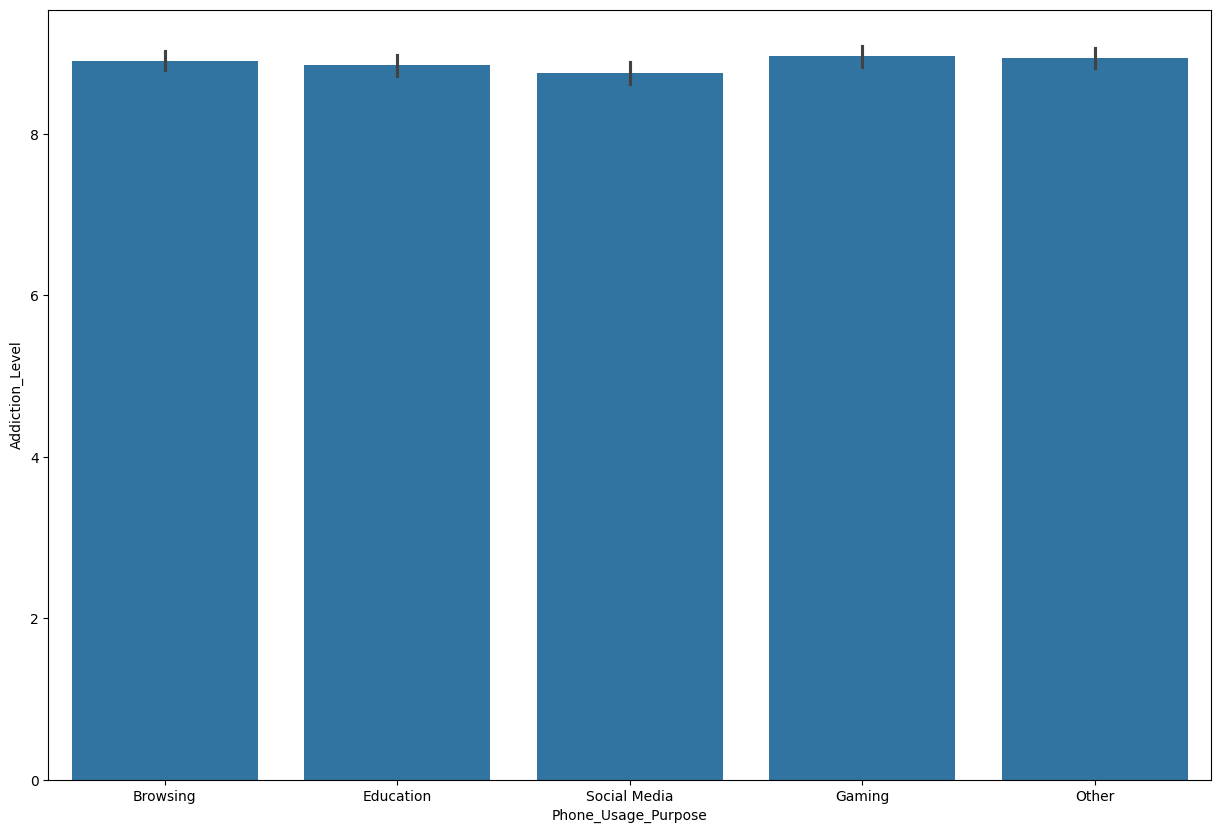

In [82]:
#Q5 What categorical has the most addiction level of student phone usuage
plt.figure(figsize=(15, 10)) 

q5 = df[['Phone_Usage_Purpose', 'Addiction_Level']]

q5.groupby('Phone_Usage_Purpose').mean()

sns.barplot(x = 'Phone_Usage_Purpose', y = 'Addiction_Level',  data = q5 , estimator='mean')
plt.show()

count    3000.000000
mean        6.489767
std         1.490713
min         3.000000
25%         5.500000
50%         6.500000
75%         7.500000
max        10.000000
Name: Sleep_Hours, dtype: float64


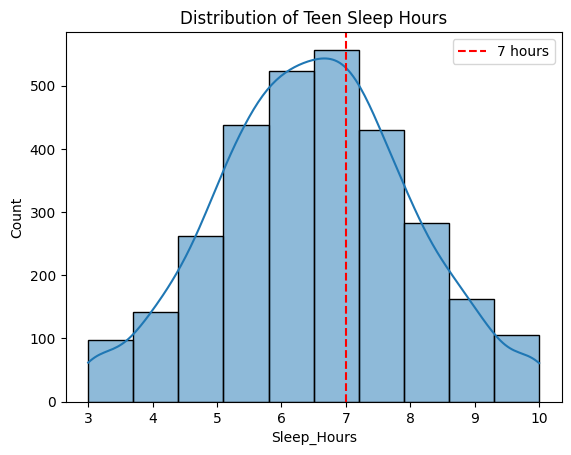

In [83]:
#Q6 How many teens sleep last than 7 hours
print(df['Sleep_Hours'].describe())

less_than_7hours = (df['Sleep_Hours'] < 7).sum()
percent = (less_than_7hours/len(df)) * 100

sns.histplot(df['Sleep_Hours'], bins=10, kde=True)
plt.axvline(7, color='red', linestyle='--', label='7 hours')
plt.title('Distribution of Teen Sleep Hours')
plt.legend()
plt.show()



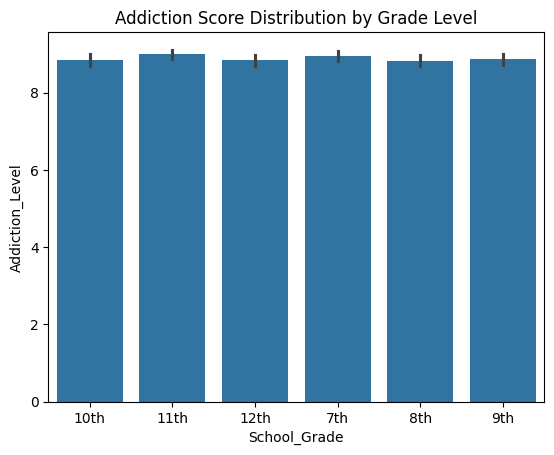

In [18]:
#7 
sns.barplot(x='School_Grade', y='Addiction_Level', data=df, order=sorted(df['School_Grade'].unique()))
plt.title("Addiction Score Distribution by Grade Level")
plt.show()

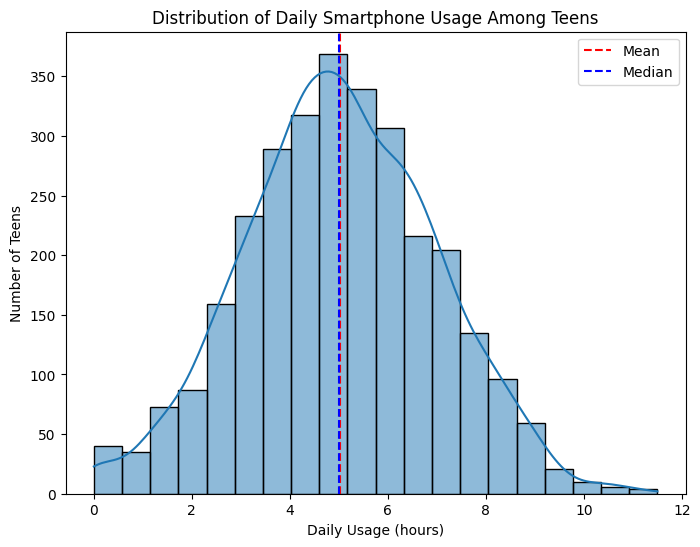

In [32]:

#8 
plt.figure(figsize=(8,6))
sns.histplot(df['Daily_Usage_Hours'], bins=20, kde=True)
plt.axvline(df['Daily_Usage_Hours'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['Daily_Usage_Hours'].median(), color='blue', linestyle='--', label='Median')
plt.title("Distribution of Daily Smartphone Usage Among Teens")
plt.xlabel("Daily Usage (hours)")
plt.ylabel("Number of Teens")
plt.legend()
plt.show()

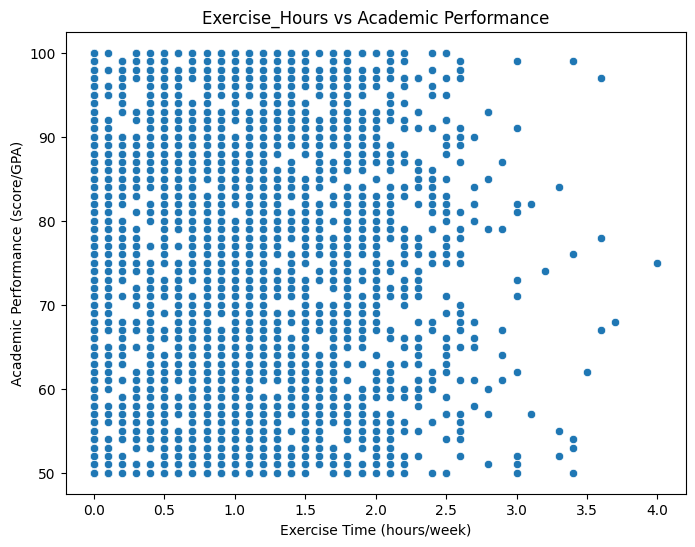

In [38]:
#9 Correlation
df[['Exercise_Hours','Academic_Performance']].corr()


plt.figure(figsize=(8,6))
sns.scatterplot(x='Exercise_Hours', y='Academic_Performance', data=df)
plt.title("Exercise_Hours vs Academic Performance")
plt.xlabel("Exercise Time (hours/week)")
plt.ylabel("Academic Performance (score/GPA)")
plt.show()

In [ ]:
#7 What is average 